# Aim

`Data Visualization, NLP`  
`use text as input and analyse text with nlp methods (tokenize, punctuation, stop words, stemming, lemmatizing etc.)`    
`text visualization`    
`Find How much of the text reducal`   
`Find How big is the dictinary`  

**References**

https://python-graph-gallery.com/1-basic-barplot/  
https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


### NLP Example

- Split data by sentence and create dataframe   
- Convert to lowercase  
- Remove Punctuation (! ? # etc.)  
- Remove Stop words (is are to etc.)  
- Stemming (fish fishes fishing)  
- Lemmatizing (good better best)  

In [15]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords, webtext
from nltk.stem import PorterStemmer
from textblob import Word
import seaborn as sns
from textblob import TextBlob
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

class NLP:

    def __init__(self):
        self.df = pd.DataFrame()
        self.text = ''
        self.df['clean_text'] = ''
        self.df['tokenized_text'] = ''
        self.frequency_result = ''
        self.raw_data_c = 0
        self.clean_data_c = 0
        self.dictionary_c = 0

    def clear(self):
        # Split data by sentence and create dataframe
        df = pd.DataFrame({'data': self.text.split(".")})
        # Convert to lowercase
        df['data'] = df['data'].apply(lambda x: " ".join(x.lower() for x in x.split()))
        # Remove Punctuation (! ? # etc.)
        df['data'] = df['data'].str.replace('[^\w\s]', "")
        # Stop words (is are to etc.)
        stop_words = set(stopwords.words('english'))
        df['data'] = df['data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
        # Stemming (fish fishes fishing)
        st = PorterStemmer()
        df['data'] = df['data'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
        # Lemmatizing (good better best)
        df['data'] = df['data'].apply(lambda x: "".join([Word(word).lemmatize() for word in x]))
        self.df['clean_text'] = df['data']
        return self.df['clean_text']

    def tokenize(self):
        # create dataframe with input
        df = pd.DataFrame({'data': self.df['clean_text']})
        # Tokenize (split to words)
        df['data'] = df['data'].apply(lambda x: nltk.word_tokenize(x))
        self.df['tokenized_text'] = df['data']
        return self.df['tokenized_text']

    def frequency(self):
        # convert dataframe to list
        self.tokenize()
        convert_list = sum(self.df['tokenized_text'], [])
        frequency = nltk.FreqDist(convert_list)
        self.frequency_result = pd.DataFrame(frequency.most_common(10), columns=['Word', 'Frequency'])
        return self.frequency_result

    def dictionary_count(self):
        self.dictionary_c = len(self.df['tokenized_text'].apply(pd.Series).stack().unique())
        return self.dictionary_c

    def clean_data_count(self):
        self.clear()
        self.clean_data_c = self.df['clean_text'].str.split().str.len().sum()
        return self.clean_data_c

    def raw_data_count(self):
        self.raw_data_c = len(self.text.split())
        return self.raw_data_c

    def make_pie(self,rd,cd,dd):
        plt.pie([raw_data_count, clean_data_count, dictionary_count],
                labels=['Raw Data Words', 'Clean Data Words', 'Dictionary'],
                autopct=lambda p: '{:.0f}'.format((p / 100) * (raw_data_count + clean_data_count + dictionary_count)),
                shadow=True,
                startangle=90)
        plt.show()


    def make_barplot(self,frequency_result):
        # create y position with length of word
        y_position = np.arange(len(frequency_result['Word'].values))

        plt.bar(y_position, frequency_result['Frequency'].values, color=['black', 'red', 'green', 'blue', 'cyan'])
        # Create names on the x-axis
        plt.xticks(y_position, frequency_result['Word'].values)
        # Show graphic
        plt.show()


        
sample = ''' Ovarian cancer remains the leading cause of death from gynecologic malignancy with an estimated death ratio of5% in whole cancer types1. Five -year survival rate of women with ovarian cancer was reported as 35% in US, andthe necessity in development of effective treatment strategies was emphasized since treatment of ovarian cancerwith current therapies is harder than any other type of female reproductive tract cancers2.The most common type of primary malignant ovarian tumors is the epithelial carcinoma that begins in theovary tissues3. This carcinoma is the most dangerous of all types of ovarian cancers. Unfortunately, it is not diagnosed until the disease is advanced in stage4.Over the last decade, enormous researches have been made to understand mechanisms of ovarian cancerpathogenesis and to identify diagnostic and prognostic targets. However, disease-specific and effective biomarkers were still not available, since studies have focused on individual genes associated with ovarian cancer, ignoringthe interactions and associations among the gene products. On the other hand, integration of biological dataat any level (gene, transcript, protein, metabolite, etc.) with biomolecular networks (i.e., gene co-expression5,protein-protein interaction6, transcriptional regulatory7, and metabolic networks8) provides valuable insights onelucidation of the disease mechanisms9, 10 and identification of molecular signatures of human diseases11–14.Co-expression networks are reconstructed from gene expression data using pairwise correlation metrics5.Altered co-expression patterns of genes between two states (for instance, healthy vs. tumor) are called differential co-expression15, which represent significant potential to identify gene clusters affected by state transition.Construction of differential co-expression networks and their topological analysis provide us valuable information on the alterations in biological systems in response to environmental and biological perturbations, such asdisease formation and gene mutation16, 17. In several studies, differential co-expression networks were studied toidentify disease associated genes and gene modules in human diseases including chronic lymphocytic leukemia18,obesity19, tumor-associated macrophages20, breast cancer21, and ovarian cancer22, 23.Zhou and coworkers22 built an integrated co-alteration network via utilization of copy number, methylation and mRNA expression data, and identified 155 ovarian cancer associated genes. In another study, throughweighted correlation network analysis, 3095 differentially expressed genes were identified from genome expression profiles of ovarian cancer patients in early and advanced cancer stages, and 6 prognosis related geneswere selected out as novel candidates for clinical biomarkers23.In the present study, considering the importance of the choice of tissue in gene expression studies24, we performed meta-analysis of transcriptome datasets including samples from laser micro-dissected epithelial cells inovarian tumor and healthy ovarian tissues, differential co-expression networks were reconstructed at two different (healthy and diseased) states, and the modules (clusters of highly connected network components) ofco-expression networks were comparatively analyzed. We identified a novel prognostic gene module, whichwas differentially co-expressed in ovarian cancer when compared to healthy tissues. Topological and functionalenrichment analyses were performed to understand the molecular mechanisms. Prognostic transcriptional regulatory elements (i.e., transcription factors and miRNAs) of the module were also investigated.'''


nlp = NLP()
nlp.text = sample
clean_text = nlp.clear()
frequency = nlp.frequency()
tokenized_text = nlp.tokenize()
raw_data_count = nlp.raw_data_count()
dictionary_count = nlp.dictionary_count()
clean_data_count = nlp.clean_data_count()


model = Word2Vec(tokenized_text,min_count=1)
vocabulary = model.wv.vocab
v1 = model.wv['cancer']

sim_words = model.wv.most_similar('cancer')
print(sim_words)


[('zhou', 0.25074058771133423), ('alter', 0.23791076242923737), ('tissues3', 0.22936278581619263), ('advanc', 0.22754395008087158), ('regulatory7', 0.20651984214782715), ('compar', 0.20079275965690613), ('genom', 0.1649797111749649), ('transcriptom', 0.16020609438419342), ('primari', 0.16003605723381042), ('earli', 0.1591370850801468)]


C:\Users\yasird\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


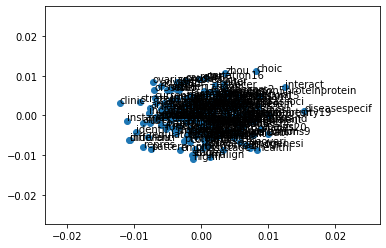

In [14]:

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

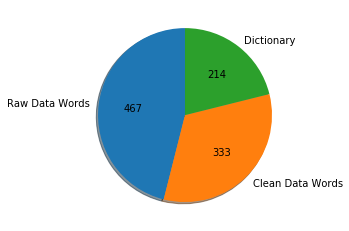

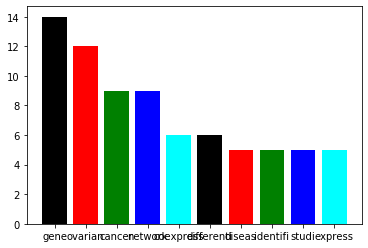

In [12]:
nlp.make_pie(raw_data_count,clean_data_count,dictionary_count)
nlp.make_barplot(frequency)